In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('datasets_33080_1320127_car data.csv')

In [2]:
data.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


Checking The Data Structure

In [3]:
data.shape

(301, 9)

Extracting The Feature Names

In [4]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

Checking The Data Type Of Features

In [5]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

Getting The Unique Values Of Categorical Feature(Object)

In [6]:
print(data['Fuel_Type'].unique())
print(data['Seller_Type'].unique())
print(data['Transmission'].unique())
print(data['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


Checking Whether There Are Missing Values Or Not

In [7]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Detail Information of Each Feature

In [8]:
data.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


To Know How Old Is The Car -- We Create A New Feature Called 'Num_Of_Years' by '2020(current Year)-Year

In [9]:
data['Curent_Year']=2020
data['Num_Of_Years']=data['Curent_Year']-data['Year']

In [10]:
data.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Curent_Year,Num_Of_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7


Considering Only Important Features

In [11]:
final_data=data[['Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner','Num_Of_Years']]

In [12]:
final_data.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Num_Of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7


Now Converting The Categorical Features Into Numeric By Using Encoing Techniques(One-Hot Encoding)

In [13]:
final_data=pd.get_dummies(final_data,drop_first=True)

In [14]:
final_data.head(3)

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1


Check How Feature Are Correlated With Each Other

In [15]:
final_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Num_Of_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


Plotting The Correlations Between Each Feature

In [16]:
import seaborn as sns

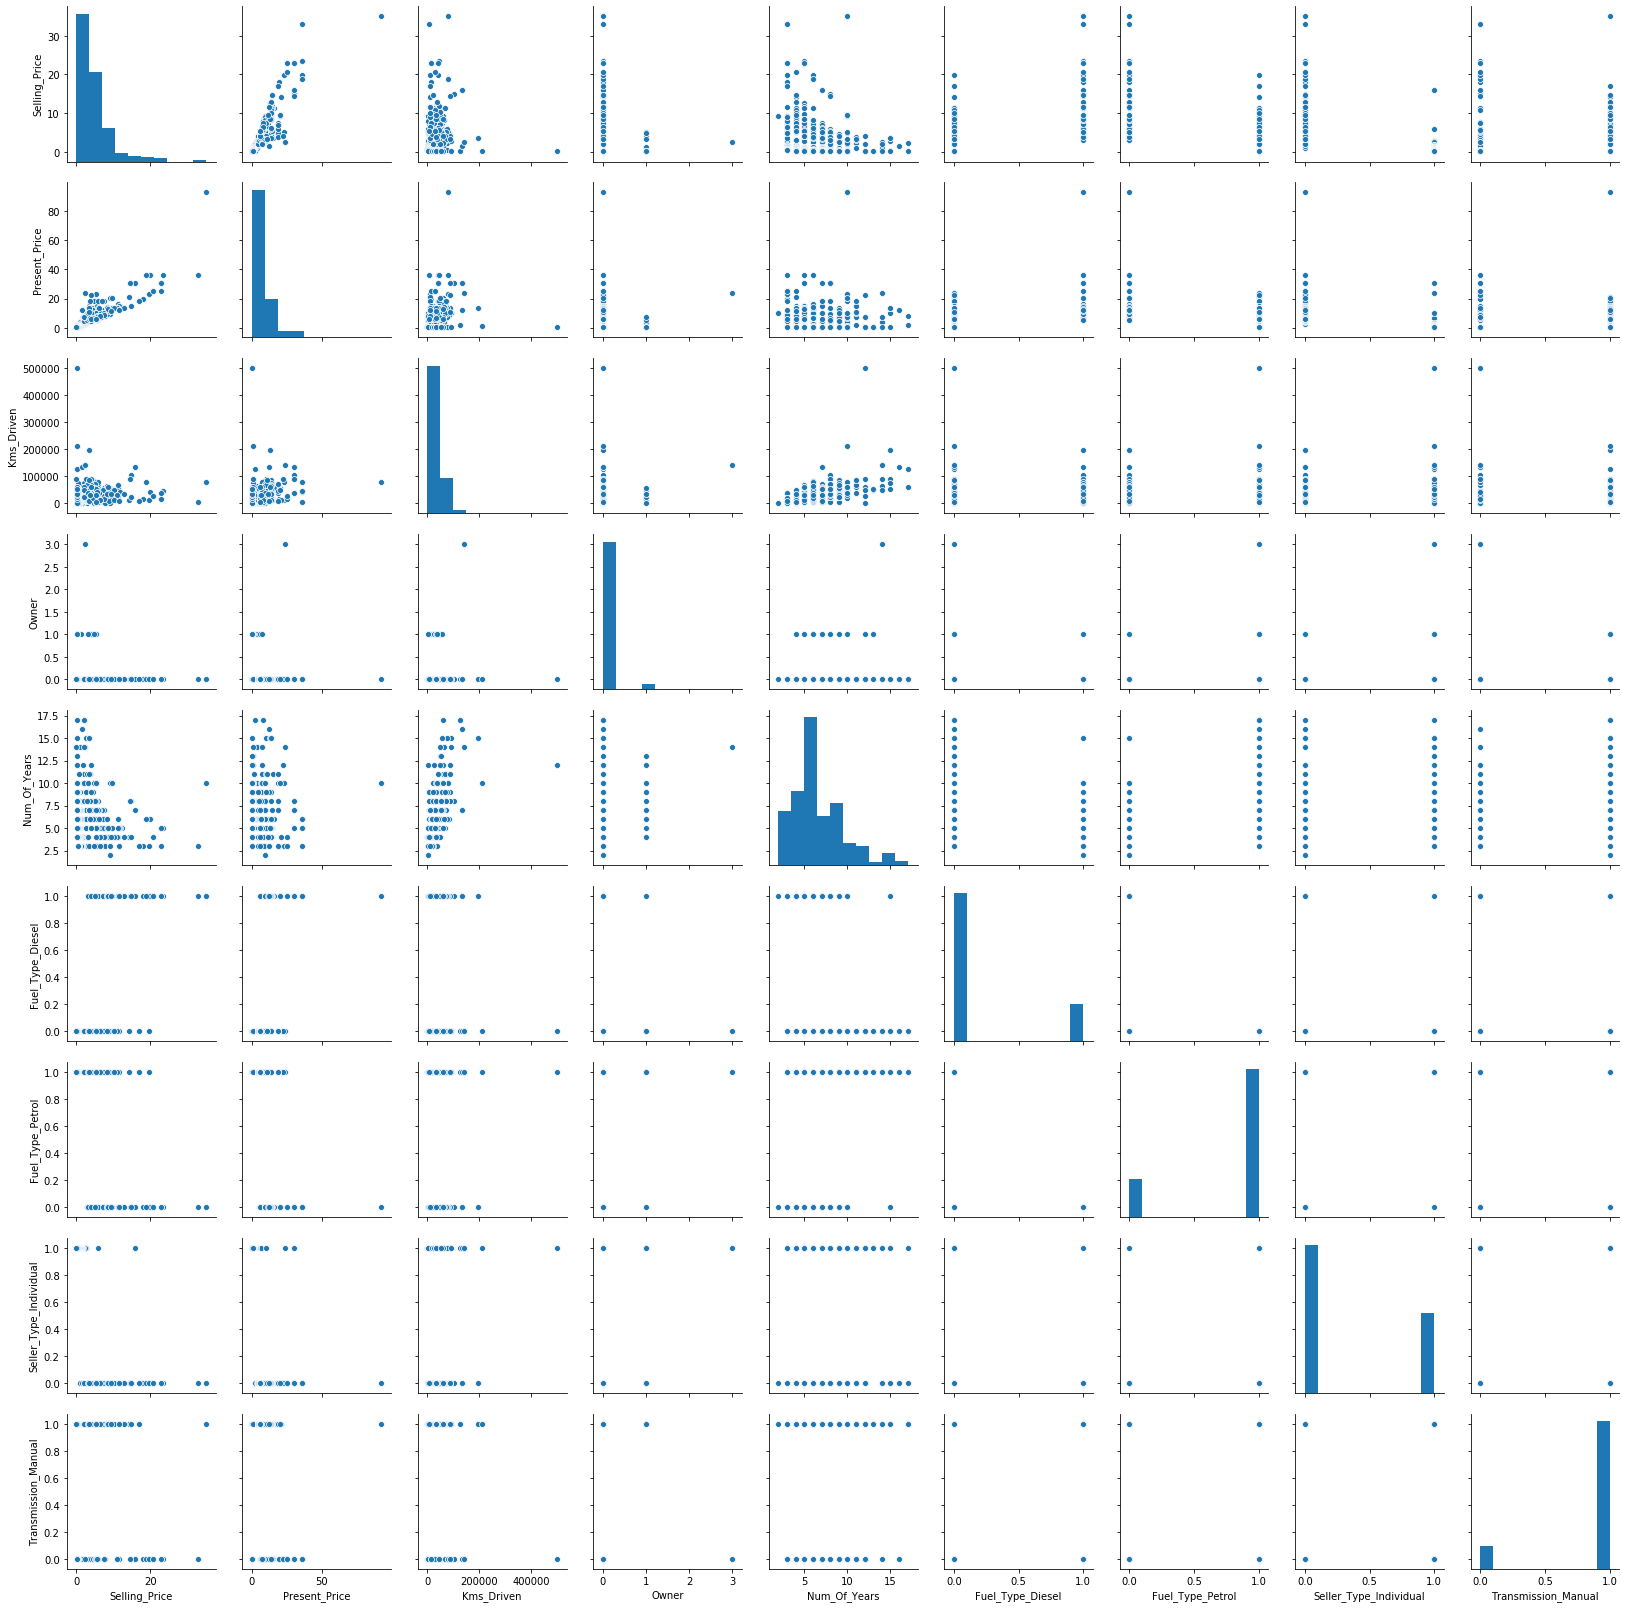

In [17]:
sns.pairplot(final_data)

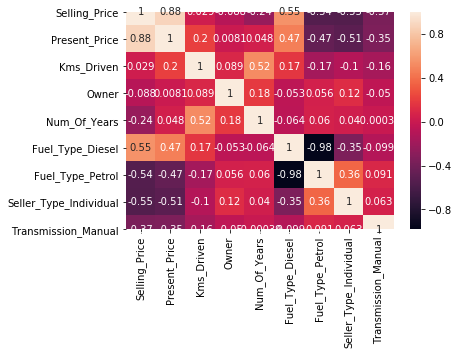

In [18]:
sns.heatmap(final_data.corr(),annot=True)

Selling_Price and Present_Price are highly correlated
Fuel_Type_Petrol and Fuel_Type_Diesel are negatively correlated

Seperating The Dependent and Independent Features

In [19]:
x=final_data.iloc[:,1:]
y=final_data.iloc[:,0]

Feature Importance

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

D:\ANA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [21]:
print(model.feature_importances_)

[3.16661623e-01 4.67939926e-02 4.89877644e-04 6.83042703e-02
 2.87195782e-01 1.16592463e-04 1.40023716e-01 1.40414146e-01]


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_text,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
x_train.shape

(240, 8)

In [24]:
y_train.shape

(240,)

In [25]:
from sklearn.linear_model import LinearRegression

In [27]:
reg=LinearRegression()

In [28]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
reg.coef_

array([ 4.26479292e-01, -6.14426907e-06, -9.43575596e-01, -3.83128077e-01,
        2.49268277e+00,  5.83590556e-01, -1.14089738e+00, -1.43561056e+00])

In [41]:
reg.predict(x_text)

array([ 7.51749959, -0.38136   ,  4.2559471 ,  9.00719207, 14.4269339 ,
        4.87144495,  3.50800415,  1.44729345,  5.3451756 ,  4.61435641,
        2.26758534,  1.6209573 ,  5.0502457 ,  7.5592941 ,  8.60637169,
       13.98391877,  7.32792948,  4.23074458, -0.43329109,  2.36959252,
        4.98862734,  3.82566592,  6.43249291,  8.02059313, -1.89494718,
        1.92952344, -0.82194725,  0.82000278,  0.0287008 ,  7.09763522,
        3.56594643,  7.42982762,  0.72122573,  7.93570184,  3.51526022,
        1.8051379 ,  5.54534144,  6.9878273 , -2.62961763,  9.08622868,
        9.21468651, 20.02249841,  4.37997532,  3.85349481,  6.66353853,
        9.8481939 ,  0.13251979,  1.68098927,  5.0992548 ,  7.35232556,
        8.07177253,  4.17227139,  4.84915569, 20.36876087,  1.7479962 ,
        1.30291959,  0.30682078,  1.98321103,  3.37503799,  0.87901548,
        3.52730876])

 variance score: 1 means perfect prediction

In [31]:
print('Variance score: {}'.format(reg.score(x_text, y_test)))

Variance score: 0.914434297222852


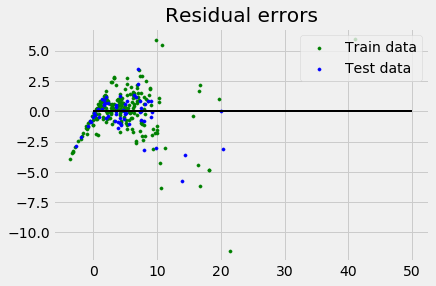

In [32]:
import matplotlib.pyplot as plt
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(x_text), reg.predict(x_text) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

In [33]:
# Calculate our y hat (how our model performs against the test data held off)
y_hat_test = reg.predict(x_text)

In [34]:
y_hat_test

array([ 7.51749959, -0.38136   ,  4.2559471 ,  9.00719207, 14.4269339 ,
        4.87144495,  3.50800415,  1.44729345,  5.3451756 ,  4.61435641,
        2.26758534,  1.6209573 ,  5.0502457 ,  7.5592941 ,  8.60637169,
       13.98391877,  7.32792948,  4.23074458, -0.43329109,  2.36959252,
        4.98862734,  3.82566592,  6.43249291,  8.02059313, -1.89494718,
        1.92952344, -0.82194725,  0.82000278,  0.0287008 ,  7.09763522,
        3.56594643,  7.42982762,  0.72122573,  7.93570184,  3.51526022,
        1.8051379 ,  5.54534144,  6.9878273 , -2.62961763,  9.08622868,
        9.21468651, 20.02249841,  4.37997532,  3.85349481,  6.66353853,
        9.8481939 ,  0.13251979,  1.68098927,  5.0992548 ,  7.35232556,
        8.07177253,  4.17227139,  4.84915569, 20.36876087,  1.7479962 ,
        1.30291959,  0.30682078,  1.98321103,  3.37503799,  0.87901548,
        3.52730876])

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# See our Squared Mean Error score and Root Mean Squared Error:
mse = mean_squared_error(y_test, y_hat_test)
print(mse)
rmse = np.sqrt(mse)
print(rmse)
# See our Mean Absolute Error
mae = mean_absolute_error(y_test, y_hat_test)
print(mae)

2.162871527787591
1.470670434797542
0.9937753386730455
